In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 

In [4]:
df= pd.read_csv('credit_demo.csv',na_values=['Missing','n/a','N/A','NA',''])

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_HISTORY', 'BILL_AMT', 'PAY_AMT', 'default'],
      dtype='object')

In [6]:
#spliting data into training(80%) and testing(20%)
#to get the same sample each time hence we give random_state which acts as a label to the data

df_train = df.sample(frac=0.80,random_state=123)

In [7]:
df_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
641,643,140000,MALE,1,2,44.0,-1,5881.666667,5000.500000,0
1391,1395,210000,MALE,1,1,53.0,-1,6383.166667,5612.166667,0
1195,1199,310000,FEMALE,1,2,27.0,-1,1490.666667,3571.833333,0
1461,1465,120000,FEMALE,2,1,41.0,-1,5993.000000,4687.666667,0
2502,2507,160000,MALE,2,2,36.0,-1,166.666667,166.666667,0


In [10]:
#percentage of defaulters

df_train['default'].value_counts()/df_train.shape[0]

0    0.672796
1    0.327204
Name: default, dtype: float64

In [11]:
df['default'].value_counts()/df.shape[0]

0    0.668673
1    0.331327
Name: default, dtype: float64

In [12]:
df.isnull().sum()

ID              0
LIMIT_BAL       0
GENDER          0
EDUCATION       0
MARRIAGE        0
AGE            21
PAY_HISTORY     0
BILL_AMT        0
PAY_AMT         0
default         0
dtype: int64

In [14]:
#to round off the values
pd.options.display.float_format='{:.0f}'.format
df_train.describe()





,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
count,2393,2393,2393,2393,2374,2393,2393,2393,2393
mean,1496,188103,2,1,37,-0,19670,5446,0
std,863,130588,1,1,9,2,39619,12307,0
min,1,10000,0,0,21,-2,-4466,0,0
25%,745,80000,1,1,29,-1,1387,850,0
50%,1492,180000,2,1,35,-1,4724,2082,0
75%,2236,260000,2,2,43,2,18970,5558,1
max,2999,800000,6,3,91,8,386530,385692,1


<AxesSubplot:>

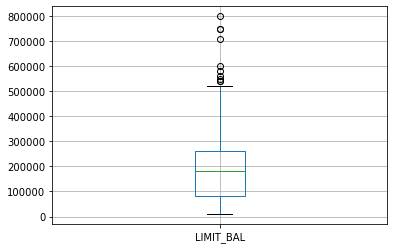

In [15]:
df_train.boxplot(column='LIMIT_BAL')

In [18]:
#to fing the outliner that are above 99% of the data

df_train['LIMIT_BAL'].quantile(0.99)

500000.0

In [19]:
# to see the data beyond 99%

df_train.loc[(df_train['LIMIT_BAL']>500000)]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
823,825,710000,MALE,2,2,33,-1,6836,9935,0
1031,1035,580000,MALE,1,2,31,-1,2986,2866,0
1518,1522,510000,FEMALE,1,1,37,-1,1212,1338,0
2696,2701,540000,FEMALE,1,2,34,-1,1107,1086,0
1412,1416,510000,FEMALE,1,1,48,-1,9446,8387,0
239,240,540000,FEMALE,1,2,34,-1,1077,946,0
502,503,750000,FEMALE,2,1,43,-1,79797,88402,0
2226,2230,520000,MALE,2,1,34,-1,29427,28538,0
1275,1279,520000,MALE,1,2,39,-1,19802,18907,0
981,984,520000,MALE,1,1,55,-1,11472,11941,0


<AxesSubplot:>

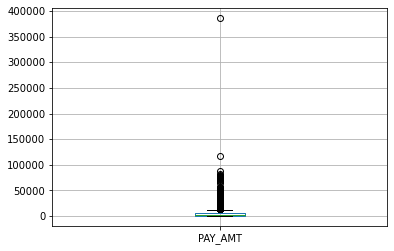

In [20]:
df_train.boxplot(column='PAY_AMT')

In [21]:
df_train['PAY_AMT'].quantile(0.99)

50938.346669999984

In [23]:
df_train.loc[(df_train['PAY_AMT']>500000)]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default


In [24]:
pd.crosstab(df_train['default'],df_train['GENDER'],margins=True)

GENDER,FEMALE,MALE,All
default,,,
0,1049,561,1610
1,432,351,783
All,1481,912,2393


In [26]:
pd.options.display.float_format='{:.2f}'.format
pd.crosstab(df_train['default'],df_train['GENDER'],margins=True)/df_train.shape[0]

GENDER,FEMALE,MALE,All
default,,,
0,0.44,0.23,0.67
1,0.18,0.15,0.33
All,0.62,0.38,1.00


In [27]:

pd.crosstab(df_train['default'],df_train['EDUCATION'],margins=True)/df_train.shape[0]

EDUCATION,0,1,2,3,4,5,6,All
default,,,,,,,,
0,0.00,0.35,0.23,0.08,0.00,0.00,0.00,0.67
1,0.00,0.09,0.18,0.06,0.00,0.00,0.00,0.33
All,0.00,0.44,0.41,0.14,0.00,0.00,0.00,1.00


In [28]:

pd.crosstab(df_train['default'],df_train['PAY_HISTORY'],margins=True)/df_train.shape[0]

PAY_HISTORY,-2,-1,2,3,4,5,6,7,8,All
default,,,,,,,,,,
0,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67
1,0.05,0.00,0.24,0.03,0.00,0.00,0.00,0.01,0.00,0.33
All,0.05,0.67,0.24,0.03,0.00,0.00,0.00,0.01,0.00,1.00


### Bucketing the numerical values to categorical data

In [32]:
def limit_bal_bucket(x):
        if 0<x<100000:
            return 'LOW'
        elif 100000<x<200000:
            return 'MEDIUM'
        else:
            return 'HIGH'

In [34]:
df_train['LIMIT']= df_train['LIMIT_BAL'].map(limit_bal_bucket)

In [35]:
df_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
641,643,140000,MALE,1,2,44.00,-1,5881.67,5000.50,0,MEDIUM
1391,1395,210000,MALE,1,1,53.00,-1,6383.17,5612.17,0,HIGH
1195,1199,310000,FEMALE,1,2,27.00,-1,1490.67,3571.83,0,HIGH
1461,1465,120000,FEMALE,2,1,41.00,-1,5993.00,4687.67,0,MEDIUM
2502,2507,160000,MALE,2,2,36.00,-1,166.67,166.67,0,MEDIUM


In [36]:

pd.crosstab(df_train['default'],df_train['LIMIT'],margins=True)/df_train.shape[0]

LIMIT,HIGH,LOW,MEDIUM,All
default,,,,
0,0.40,0.11,0.17,0.67
1,0.08,0.19,0.06,0.33
All,0.48,0.29,0.23,1.00


In [39]:
#here we remove the null values
df_train['AGE'] = df_train['AGE'].fillna(df_train['AGE'].mean())

In [38]:
df_train.isnull().sum()

ID             0
LIMIT_BAL      0
GENDER         0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_HISTORY    0
BILL_AMT       0
PAY_AMT        0
default        0
LIMIT          0
dtype: int64

In [40]:
df_train['AGE'].describe()

count   2393.00
mean      36.69
std        9.19
min       21.00
25%       29.00
50%       36.00
75%       43.00
max       91.00
Name: AGE, dtype: float64

In [42]:
df_train.loc[(df_train['AGE']>70)]

#we can delete the value of this extreme observation
#or we update the value with the mean value
#we have to do this beacuse: there can be error in updating an info 
#or w ecan assume that there is a hypo from this extreme obs

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
252,253,260000,FEMALE,1,2,91.00,-1,1835.33,1987.50,0,HIGH


In [45]:
avg= df_train['AGE'].mean()

In [46]:
#we wont have skewness in the data
df_train.loc[(df_train['AGE']>70),'AGE']=avg


In [47]:
df_train['AGE'].describe()

count   2393.00
mean      36.66
std        9.12
min       21.00
25%       29.00
50%       36.00
75%       43.00
max       69.00
Name: AGE, dtype: float64

In [49]:
def age_bucket(x):
        if 20<x<29:
            return 'lessthan30'
        elif 29<=x<35:
            return 'bw29to35'
        elif 35<=x<45:
            return 'bw35to45'
        else:
            return 'morethan45'

In [50]:
df_train['age_bucket']=df_train['AGE'].map(age_bucket)

In [52]:
df_train['age_bucket'].head()

641       bw35to45
1391    morethan45
1195    lessthan30
1461      bw35to45
2502      bw35to45
Name: age_bucket, dtype: object

In [54]:
pd.crosstab(df_train['default'],df_train['age_bucket'],margins=True)/df_train.shape[0]

age_bucket,bw29to35,bw35to45,lessthan30,morethan45,All
default,,,,,
0,0.18,0.24,0.12,0.13,0.67
1,0.07,0.10,0.09,0.07,0.33
All,0.25,0.34,0.21,0.20,1.00


array([[<AxesSubplot:title={'center':'PAY_AMT'}>]], dtype=object)

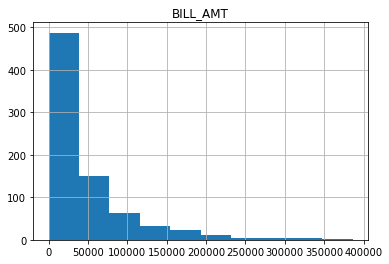

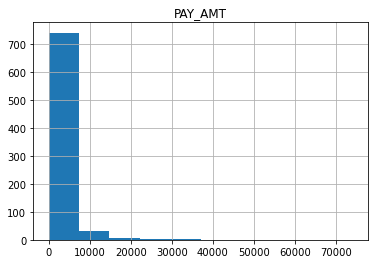

In [56]:
df_train.query('default==1').hist('BILL_AMT')
df_train.query('default==1').hist('PAY_AMT')

array([[<AxesSubplot:title={'center':'PAY_AMT'}>]], dtype=object)

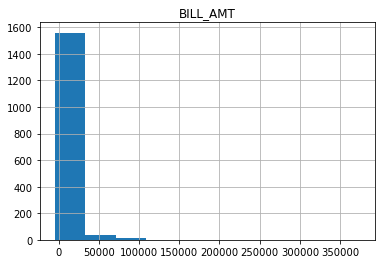

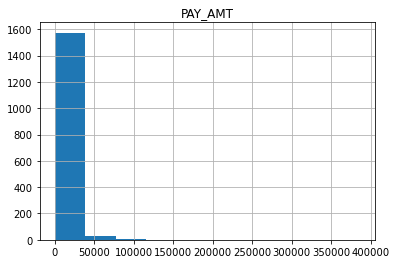

In [57]:
df_train.query('default==0').hist('BILL_AMT')
df_train.query('default==0').hist('PAY_AMT')

In [60]:
def billamt_bucket(x):
    if x<5000:
        return 'LOW'
    elif 5000<=x<20000:
        return 'MEDIUM'
    else:
        return 'HIGH'

In [62]:
df_train['bill_bucket']= df_train['BILL_AMT'].map(billamt_bucket)

In [64]:
pd.crosstab(df_train['default'],df_train['bill_bucket'])/df_train.shape[0]

bill_bucket,HIGH,LOW,MEDIUM
default,,,
0,0.05,0.44,0.18
1,0.19,0.07,0.07


In [65]:
def payamt_bucket(x):
    if x<833:
        return 'LOW'
    elif 833<=x<5281:
        return 'MEDIUM'
    else:
        return 'HIGH'

In [66]:
df_train['pay_bucket']=df['PAY_AMT'].map(payamt_bucket)

In [67]:
pd.crosstab(df_train['default'],df_train['pay_bucket'],margins=True)/df_train.shape[0]

pay_bucket,HIGH,LOW,MEDIUM,All
default,,,,
0,0.23,0.15,0.29,0.67
1,0.04,0.09,0.20,0.33
All,0.26,0.24,0.50,1.00


In [69]:
df_train['GENDER']= df_train['GENDER'].map(lambda x:1 if x=='MALE' else 0)

In [70]:
df_train['GENDER'].head()

641     1
1391    1
1195    0
1461    0
2502    1
Name: GENDER, dtype: int64

In [74]:
df_train.drop(df_train.query('EDUCATION==0 | EDUCATION>3').index)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT,age_bucket,bill_bucket,pay_bucket
641,643,140000,1,1,2,44.00,-1,5881.67,5000.50,0,MEDIUM,bw35to45,MEDIUM,MEDIUM
1391,1395,210000,1,1,1,53.00,-1,6383.17,5612.17,0,HIGH,morethan45,MEDIUM,HIGH
1195,1199,310000,0,1,2,27.00,-1,1490.67,3571.83,0,HIGH,lessthan30,LOW,MEDIUM
1461,1465,120000,0,2,1,41.00,-1,5993.00,4687.67,0,MEDIUM,bw35to45,MEDIUM,MEDIUM
2502,2507,160000,1,2,2,36.00,-1,166.67,166.67,0,MEDIUM,bw35to45,LOW,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1982,50000,0,2,1,30.00,-1,2859.17,2937.00,0,LOW,bw29to35,LOW,MEDIUM
873,876,30000,1,2,2,27.00,-1,1248.67,1061.67,0,LOW,lessthan30,LOW,MEDIUM
2722,2727,170000,0,2,2,38.00,-1,9299.50,14457.67,0,MEDIUM,bw35to45,MEDIUM,HIGH
539,541,240000,1,1,1,47.00,2,141243.67,5696.17,1,HIGH,morethan45,HIGH,HIGH


In [75]:
df_train['EDUCATION'].unique()

array([1, 2, 3, 4, 6, 5, 0], dtype=int64)

In [77]:
df_train.columns.unique()

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_HISTORY', 'BILL_AMT', 'PAY_AMT', 'default', 'LIMIT', 'age_bucket',
       'bill_bucket', 'pay_bucket'],
      dtype='object')

In [76]:
#this is done for marital status and pay_hsitory

In [ ]:
df_final= get_dummies(df_train , columns=)